Kuba Czech | Adam Wilczyński

# Algorithms with backtracking (Eulerian and Hamiltonian cycle)

## Euler cycle

Type of cycle where it is possible to choose such a route that we can traverse every arc only once and finish in a starting vertex (but we can visit each node more than once)

## Hamiltonian cycle

Cycle where it is possible to choose such a route that we can visit every vertex once and finish in a starting vertex (but we can traverse through each arc more than once)

In [7]:
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import graph_cycles

In [1]:
euler_and_hamilton_cycle_graph = graph_cycles.generate_euler_and_hamilton_cycle_graph(8)
print(euler_and_hamilton_cycle_graph)

print("Euler cycle: ", graph_cycles.find_euler_cycle_using_hierholzer(euler_and_hamilton_cycle_graph))
print("Hamiltonian cycle: ", graph_cycles.find_hamiltonian_cycle_using_backtracking(euler_and_hamilton_cycle_graph, []))

{0: [7, 1], 1: [0, 2], 2: [1, 3], 3: [2, 4], 4: [3, 5], 5: [4, 6], 6: [5, 7], 7: [6, 0]}
Euler cycle:  deque([7, 6, 5, 4, 3, 2, 1, 0, 7])
Hamiltonian cycle:  [0, 7, 6, 5, 4, 3, 2, 1]


In [17]:
timing = pd.DataFrame(columns="algorithm is_graph_random vertex_count time".split())

EXPERIMENT_N = 3

for vertex_count in range(5, 25):
    euler_and_hamilton_cycle_graph = graph_cycles.generate_euler_and_hamilton_cycle_graph(vertex_count)
    timing.loc[timing.shape[0]] = [
        "hamilton",
        False,
        vertex_count,
        timeit.timeit(lambda: graph_cycles.find_hamiltonian_cycle_using_backtracking(euler_and_hamilton_cycle_graph, []), number=EXPERIMENT_N),
        ]
    timing.loc[timing.shape[0]] = [
        "euler",
        False,
        vertex_count,
        timeit.timeit(lambda: graph_cycles.find_euler_cycle_using_hierholzer(euler_and_hamilton_cycle_graph), number=EXPERIMENT_N),
        ]

    random_simple_graph = graph_cycles.generate_random_simple_graph(vertex_count, edge_count=vertex_count * 2)
    timing.loc[timing.shape[0]] = [
        "hamilton",
        True,
        vertex_count,
        timeit.timeit(lambda: graph_cycles.find_hamiltonian_cycle_using_backtracking(random_simple_graph, []), number=EXPERIMENT_N),
        ]
    timing.loc[timing.shape[0]] = [
        "euler",
        True,
        vertex_count,
        timeit.timeit(lambda: graph_cycles.find_euler_cycle_using_hierholzer(random_simple_graph), number=EXPERIMENT_N),
        ]

timing

,algorithm,is_graph_random,vertex_count,time
0,hamilton,False,5,0.000264
1,euler,False,5,0.000080
2,hamilton,True,5,0.000480
3,euler,True,5,0.000094
4,hamilton,False,6,0.000339
...,...,...,...,...
75,euler,True,23,0.000283
76,hamilton,False,24,0.004655
77,euler,False,24,0.000256
78,hamilton,True,24,2.369981


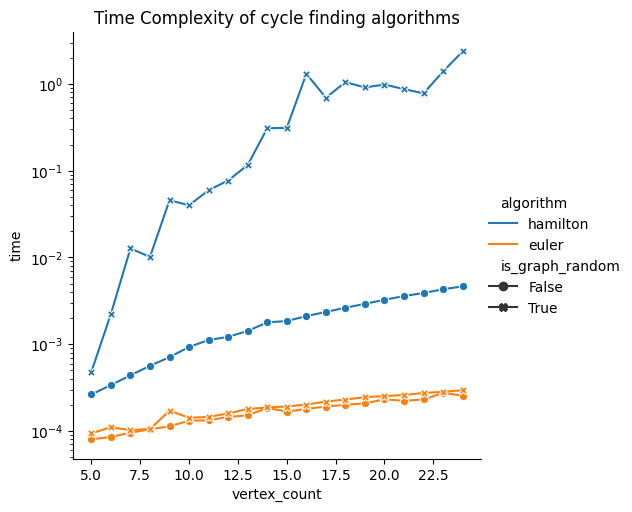

In [18]:
# https://seaborn.pydata.org/tutorial/relational.html

sns.relplot(
    data=timing, kind="line",
    x="vertex_count", y="time", hue="algorithm", style="is_graph_random",
    dashes=False, markers=True,
)
plt.title("Time Complexity of cycle finding algorithms")
plt.yscale("log")